In [2]:
import os
import h5py
import numpy as np
from sklearn.svm import SVC, LinearSVC
import time

In [3]:
import itertools
import glob
import pickle

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mne.viz import circular_layout, plot_connectivity_circle

**Results visualization : the Circular Plot!**

In [5]:
# Need to arrange the data in a 190x190 matrix, then start the mne visualization
mylabels = ['a', 'b', 'c', 'd', 'e', 'g', 'h', 'l', 'm', 'n',
            'o', 'p', 'q', 'r', 's', 'u', 'v', 'w', 'y', 'z']

In [6]:
data_plot = np.zeros((190, 3))
labels = range(1, 21)
data_plot[:, :2] = np.array(list(itertools.combinations(labels, 2)))

In [7]:
completed_filenames = glob.glob('./ovo_results/spindle_firing_full_variability*')

In [8]:
accuracy_vals = []
for filename in completed_filenames:
    try:
        temp_result = pickle.load(open(filename, 'rb'))['spindle_firing']
        pairid = os.path.basename(filename)[32:-2]
        temp_acc = []
        for i in range(len(temp_result[1])):
            temp_acc.append(temp_result[1][i])
        accuracy_vals.append((pairid, max(temp_acc)))
    except:
        print(f'Trained SVM for {pairid} not accessible.')

In [9]:
corr_mat = np.zeros((20, 20))
for pair in accuracy_vals:
    i, j = pair[0].split('_')
    i = int(i)-1; j = int(j)-1
    corr_mat[i, j] = pair[1]
    corr_mat[j, i] = pair[1]

/usr/local/lib/python3.6/dist-packages/mne/viz/circle.py:305: RuntimeWarning: invalid value encountered in greater_equal
  con_draw_idx = np.where(con_abs >= con_thresh)[0]


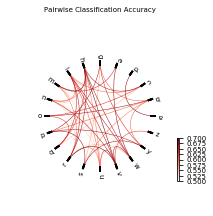

In [18]:
plot_allpairs = False
accuracy_cutoff = 0.7

plot_corrmat = corr_mat.copy()
if not plot_allpairs:
    plot_corrmat = corr_mat.copy()
    plot_corrmat[corr_mat > accuracy_cutoff] = np.nan

myfig = plt.figure(figsize=[4, 4])
a = plot_connectivity_circle(plot_corrmat, mylabels, node_width=0, facecolor='white', 
        colormap='Reds', textcolor='black', colorbar_pos=(-0.75,0.25), fontsize_names=7, 
        fig=myfig, fontsize_colorbar=7, fontsize_title=7, vmax=0.7, vmin=0.5,
        title='Pairwise Classification Accuracy', linewidth=0.5)

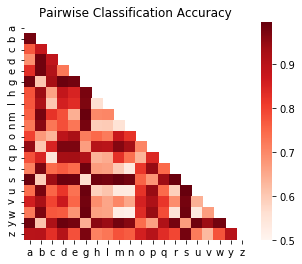

In [11]:
plt.figure(figsize=[5, 4])
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(np.tril(corr_mat), mask=mask, vmin=0.5, xticklabels=mylabels, yticklabels=mylabels,
           cmap='Reds')
plt.title('Pairwise Classification Accuracy');